In [1]:
import math
import numpy as np
import scipy.constants

In [2]:
coef_lambda = 5e-07
U_0 = 3e-20
n = 632


def read_data(path):
    with open(path, "br") as bf:
        data = np.fromfile(bf, np.float64)
    return data


def get_Pos_Vel(data, n, t):
    a = (t - 1)*(4*n + 1)
    b = t*(4*n + 1)
    
    x1 = []
    y1 = []
    
    V_x = []
    V_y = []
    
    i = 0
    for d in range(a,b - 1):
        if (b - a - i)%4 == 0:
            x1.append(data[d])
        elif (b - a - i + 1)%4 == 0:
            y1.append(data[d])
        elif (b - a - i + 2)%4 == 0:
            V_x.append(data[d])
        else:
            V_y.append(data[d])
        i = i + 1
    
    return [x1, y1, V_x, V_y]

In [3]:
import random

const_boltzmann = scipy.constants.k
temperature = 302 # 302 K or 30 C
const_alfa = random.random()

print("Const Boltzmann: ", const_boltzmann)
print("Temperature: ", temperature)
print("Const alfa: ", const_alfa)
print("Product of constants: ", const_alfa * temperature * const_boltzmann)
const = const_alfa * temperature * const_boltzmann

Const Boltzmann:  1.38064852e-23
Temperature:  302
Const alfa:  0.9190510382810683
Product of constants:  3.832037096537805e-21


In [4]:
size= 100
path = "Result/task2/spr_simulation_N_632_phi_0.17_a_5_U0_3e-20_k_0.bin"
L = 8.78082e-05
count = 5
t = 100

shape = (size, size)
potential = np.zeros(shape)
res_g = np.zeros(shape)
res_target = np.zeros(shape)

In [5]:
def SumLabmdaWithVelocity(Vb, Va, a, coef_lambda):
    summ = 0.00
    
    for i in range(1,a+1):
        for k in range(1,a+1):
            summ = summ + i*coef_lambda*Va - k*coef_lambda*Vb
    return summ

def index(size, u, L):
    if abs(u) > 3/2*L:
        return False
    
    if abs(u)> 1/2*L:
        if u > 0:
            u = u - L
        else:
            u = u + L
            
    return int(size / 2 + int(u*size/L))

In [43]:
V = L*L
const_a = V*(n-1)/n

time = [100, 200, 300, 400, 500, 600]

for w in range(0, len(time)):
    t = time[w]
    x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, t)

    print("\n Time: ", t, "\n\n")
    for a in range(0, n):
        for b in range(0, n):
            if a != b:
                # rotation matrix
                vx = v_x[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
                vy = v_y[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
                Q = np.matrix([[vy, -vx], [vx, vy]])

                xi = x[a] - x[b] + SumLabmdaWithVelocity(v_x[a], v_x[b], count, coef_lambda)
                yi = y[a] - y[b] + SumLabmdaWithVelocity(v_y[a], v_y[b], count, coef_lambda)

                # cordinates
                r1 = np.array([[x[a] - x[b]], [y[a] - y[b]]])
                r2 = np.array([[xi],[yi]])

                r_i = Q.dot(r1)
                r_target = Q.dot(r2)

                res_g[index(size, r_i[0], L)][index(size, r_i[1], L)] = res_g[index(size, r_i[0], L)][index(size, r_i[1], L)] + 1
                res_target[index(size, r_target[0], L)][index(size, r_target[1], L)] = res_target[index(size, r_target[0], L)][index(size, r_target[1], L)] + 1

                # potential 
                abs_r = math.sqrt(xi**2 + yi**2)
                exp_r = math.exp(- abs_r / coef_lambda)

                p_x = U_0 / (n**2) * ( - exp_r / abs_r )
                p_y = U_0 / (n**2) * ( - exp_r / abs_r )

                potential[index(size, r_target[0], L)][index(size, r_target[1], L)] = potential[index(size, r_target[0], L)][index(size, r_target[1], L)] + math.sqrt(p_x**2 + p_y**2)
        if a % 100 == 0: print("Progress: ", a)

potential = potential / len(time)
res_g = res_g / len(time) * const_a
res_target = res_target / len(time) * const_a


 Time:  100 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  200 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  300 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  400 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  500 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  600 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600


In [44]:
print(res_g)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.68149793e-07 2.84828967e-07 ... 3.07923207e-07
  2.71998833e-07 2.82262940e-07]
 [0.00000000e+00 2.56602673e-07 2.52753632e-07 ... 2.29659392e-07
  2.65583766e-07 2.47621579e-07]
 ...
 [0.00000000e+00 2.50187606e-07 2.83545953e-07 ... 2.32225419e-07
  2.56602673e-07 2.46338566e-07]
 [0.00000000e+00 2.84828967e-07 2.60451713e-07 ... 2.39923499e-07
  2.54036646e-07 3.23319367e-07]
 [0.00000000e+00 2.66866779e-07 2.71998833e-07 ... 2.38640485e-07
  2.77130886e-07 2.59168699e-07]]


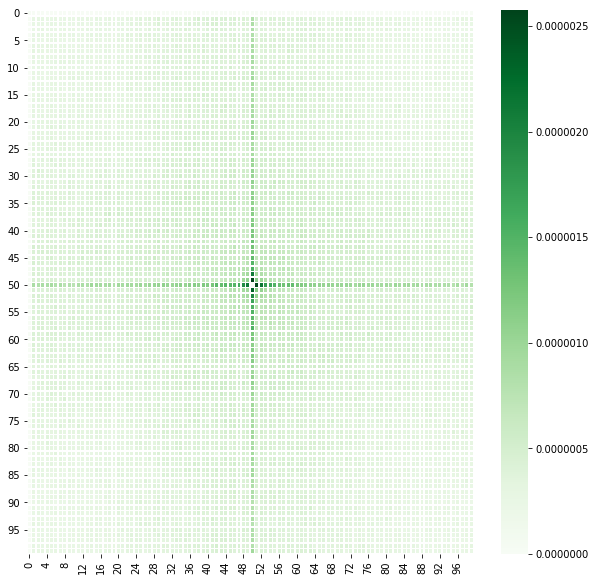

In [45]:
import seaborn as sns
import matplotlib.pylab as plt

res_g[50][50] = 0
ax = sns.heatmap(res_g, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)

plt.show()

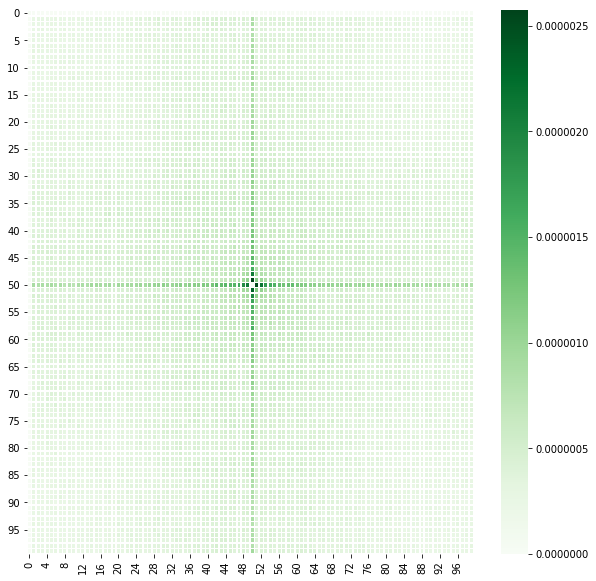

In [46]:
res_target[50][50] = 0
ax = sns.heatmap(res_target, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)

plt.show()

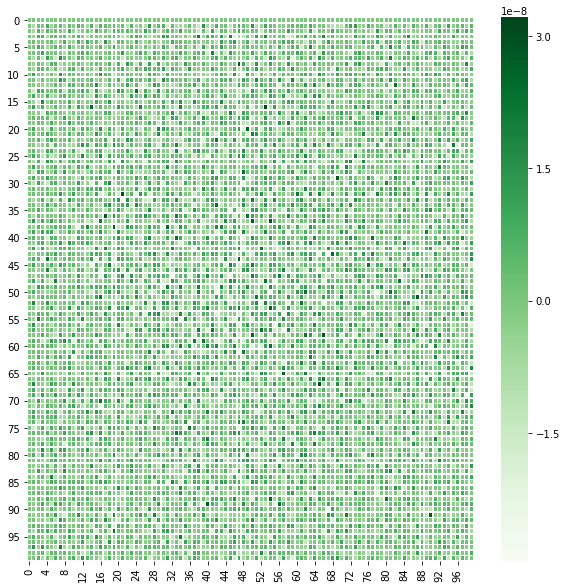

In [48]:
ax = sns.heatmap(res_target - res_g, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)

plt.show()

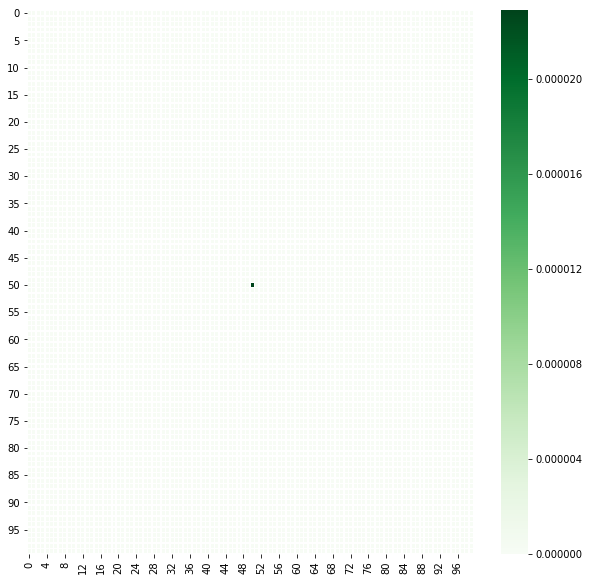

In [49]:
ax = sns.heatmap(potential, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)
plt.show()

In [52]:
for w in range(0, len(time)):
    t = time[w]
    x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, t)

    print("\n Time: ", t, "\n\n")
    for a in range(0, n):
        for b in range(0, n):
            if a != b:
                # rotation matrix
                vx = v_x[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
                vy = v_y[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
                Q = np.matrix([[vy, -vx], [vx, vy]])

                xi = x[a] - x[b] + SumLabmdaWithVelocity(v_x[a], v_x[b], count, coef_lambda)
                yi = y[a] - y[b] + SumLabmdaWithVelocity(v_y[a], v_y[b], count, coef_lambda)

                # cordinates
                r1 = np.array([[x[a] - x[b]], [y[a] - y[b]]])
                r2 = np.array([[xi],[yi]])

                r_i = Q.dot(r1)
                r_target = Q.dot(r2)

                res_g[index(size, r_i[0], L)][index(size, r_i[1], L)] = res_g[index(size, r_i[0], L)][index(size, r_i[1], L)] + 1
                res_target[index(size, r_target[0], L)][index(size, r_target[1], L)] = res_target[index(size, r_target[0], L)][index(size, r_target[1], L)] + 1
        if a % 100 == 0: print("Progress: ", a)
            
res_g = res_g / len(time) * const_a
res_target = res_target / len(time) * const_a


 Time:  100 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  200 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  300 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  400 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  500 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600

 Time:  600 


Progress:  0
Progress:  100
Progress:  200
Progress:  300
Progress:  400
Progress:  500
Progress:  600


In [53]:
g_i = res_g
g_target = res_target

In [54]:
for i in range(0, size):
    for j in range(0, size):
        if g_i[i][j] != 0: g_i[i][j] = math.log(g_i[i][j])
        if g_target[i][j] != 0: g_target[i][j] = math.log(g_target[i][j])

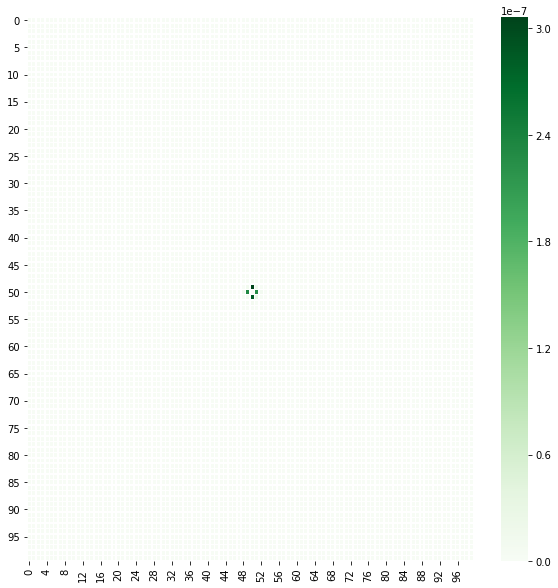

In [42]:
p = potential
p[50][50] = 0
ax = sns.heatmap(p, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)
plt.show()

In [55]:
res_pot = potential - const * (g_i - g_target)

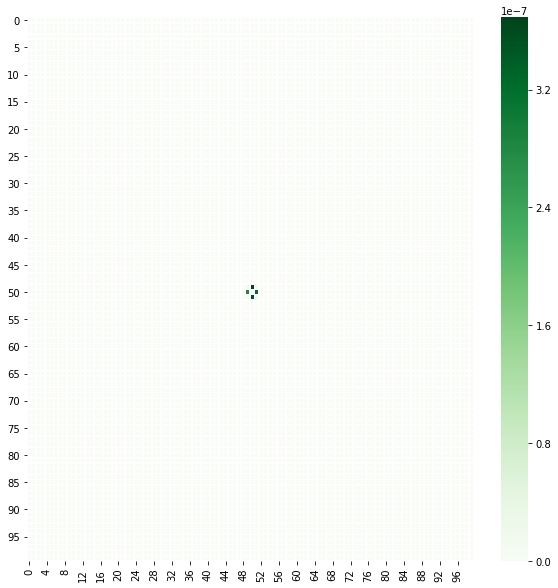

In [58]:
res_pot_m = res_pot
res_pot_m[50][50] = 0

ax = sns.heatmap(res_pot, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)
plt.show()

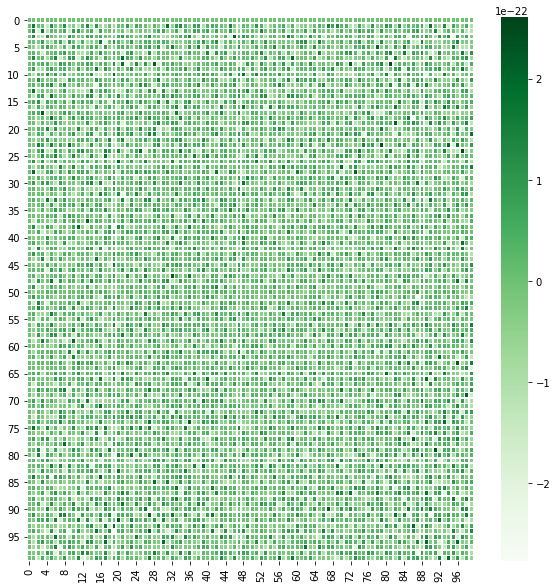

In [57]:
ax = sns.heatmap(potential - res_pot, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,10)
plt.show()